## Linear Regression in Python

Next we will see how we can implement this model in Python. To do this, we will use the `scikit-learn` library.

### Simple linear regression

To exemplify the implementation of a simple linear regression model we will use a dataset with few instances and that has been previously treated with a full EDA.

#### Step 1. Reading the processed data set

In [1]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv")

train_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


As the exploratory analysis process has not been shown in this notebook, the relationship between the predictor variable and the target variable (this is seen in the univariate analysis) will be visualized below using a dot plot:

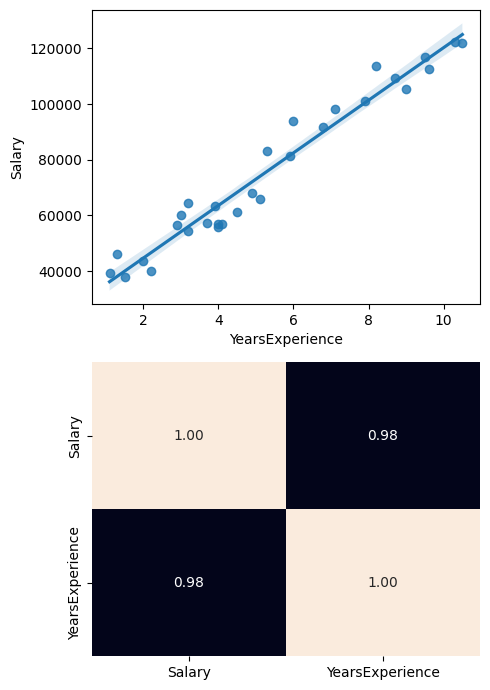

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = total_data, x = "YearsExperience", y = "Salary")
sns.heatmap(total_data[["Salary", "YearsExperience"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

There is a clear linear relationship between the predictor variable and the target variable, so it can be easily modeled by this type of model. If the correlation were lower, the model would not have good accuracy.

The train set will be used to train the model, while the test set will be used to evaluate the effectiveness of the model. We will also split the predictors of the features.

In [3]:
X_train = train_data.drop(["Salary"], axis = 1)
y_train = train_data["Salary"]
X_test = test_data.drop(["Salary"], axis = 1)
y_test = test_data["Salary"]

#### Step 2: Initialization and training of the model

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

After the training process we can know the parameters (variables $a$ and $b$) that the model has fitted:

In [5]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercep (a): 26354.43069701219
Coefficients (b): [9277.78307971]


In this case there is only one coefficient since the linear regression is simple.

#### Step 3: Model prediction

In [6]:
y_pred = model.predict(X_test)
y_pred

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

Para comparar el valor predicho del original, podemos fácilmente realizar un plot comprativo como el siguiente:

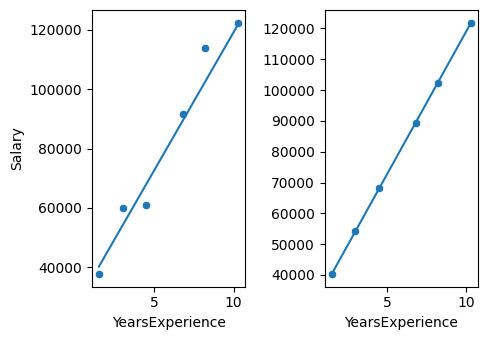

In [7]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: 26354.43069701219 + 9277.78307971 * x

sns.scatterplot(ax = axis[0], data = test_data, x = "YearsExperience", y = "Salary")
sns.lineplot(ax = axis[0], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"]))
sns.scatterplot(ax = axis[1], x = test_data["YearsExperience"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"])).set(ylabel = None)

plt.tight_layout()

plt.show()

As we can see, the test predicted by the model will always fit the regression equation, since it is the one learned by the model. The figure on the left represents the actual values while those on the right, the predicted ones. We see that some predicted values coincide with the actual values and those that do not have a noticeable difference. We will see next the value of the metric to learn more about the performance of the algorithm.

To calculate the effectiveness of the model we will use the **mean squared error** (*RMSE*) and the **coefficient of determination** ($R^2$), one of the most popular metrics:

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean square error: 37649779.451336615
Coefficient of determination: 0.959714925174946


The lower the RMSE value, the better the model. A perfect model (a hypothetical model that can always predict the exact expected value) would have a value for this metric of 0. We observe that there is a slippage of 37 million, so we could understand that it is very bad. If we rely on the $R^2$ value, we observe that it is 95%, a very high value, then 95% of the data are explained by the model, so it is satisfactory.

#### Step 4: Optimization of results

We could perform a **grid search** to optimize the model results by looking for a hyperparameter configuration that minimizes the RMSE.

### Multiple linear regression

To exemplify the implementation of a simple multiple regression model we will use a data set with few instances and which has been previously treated with a full EDA.

#### Step 1. Reading the processed data set

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_test.csv")

train_data["Gender"] = pd.factorize(train_data["Gender"])[0]
test_data["Gender"] = pd.factorize(test_data["Gender"])[0]

train_data.head()

,Gender,Height,Weight
0,0,61.391644,120.681907
1,1,74.697637,209.373126
2,1,68.507815,200.877279
3,0,65.797516,134.342745
4,0,67.161806,160.201031


For this problem, we want to calculate the weight (`weight`) as a function of the height (`height`) and gender (`gender`) of the person. Therefore, weight will be the dependent variable (target variable) and height and gender, the independent variables (predictor variables). Since this is a continuous numerical prediction, we have to solve this with a multiple logistic regression model.

As the exploratory analysis process has not been shown in this notebook, the relationship between the predictor variable and the target variables (this is seen in the univariate analysis) will be visualized below using a dot plot:

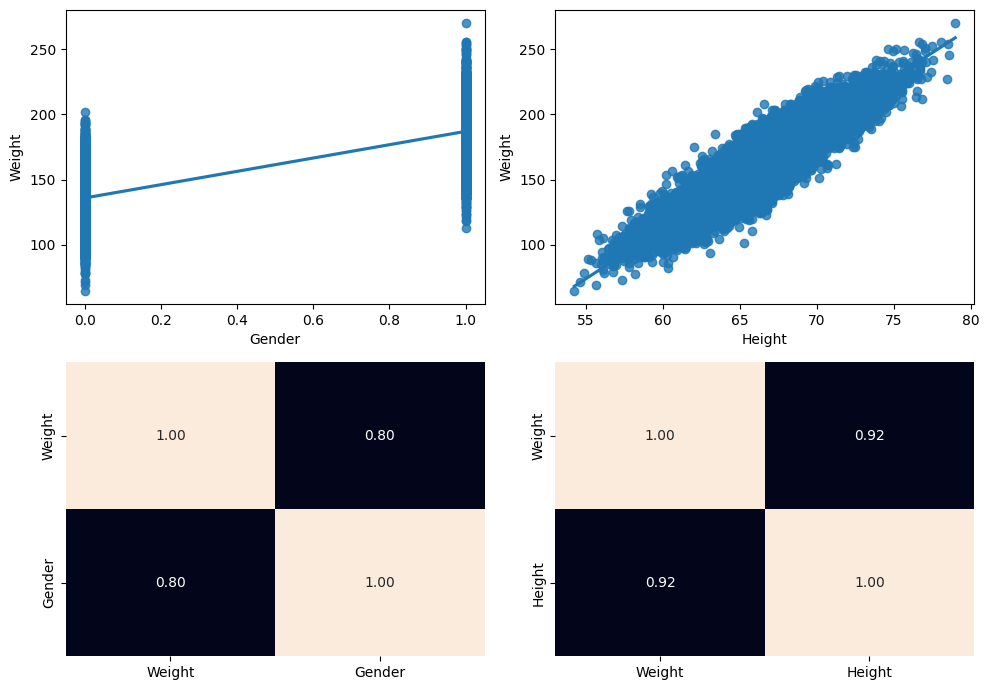

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "Gender", y = "Weight")
sns.heatmap(total_data[["Weight", "Gender"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Height", y = "Weight")
sns.heatmap(total_data[["Weight", "Height"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

There is a clear linear relationship between the predictor variable and the target variables, so it can be easily modeled by this type of model. If the correlation were lower, the model would not have good accuracy.

In [11]:
X_train = train_data.drop(["Weight"], axis = 1)
y_train = train_data["Weight"]
X_test = test_data.drop(["Weight"], axis = 1)
y_test = test_data["Weight"]

#### Step 2: Initialization and training of the model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

After the training process we can know the parameters (variables $a$ and $b_1, b_2$) that the model has fitted:

In [13]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): -244.69356793639193
Coefficients (b1, b2): [19.34720343  5.97314123]


#### Step 3: Model prediction

In [14]:
y_pred = model.predict(X_test)
y_pred

array([165.58497097, 185.78096721, 171.25903401, ..., 126.76971077,
       175.2620878 , 105.52795239])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean square error: 101.24427647013303
Coefficient of determination: 0.9033321846361925


If we rely on the value of $R^2$, we observe that it is 90%, a very high value, then 90% of the data are explained by the model, so it is satisfactory.

#### Step 4: Optimization of results

We could perform a **grid search** to optimize the model results by looking for a hyperparameter configuration that minimizes the RMSE.